#### PRCP-1000-Portugese Bank
### Problem statement -
 The portugese banking institution conducted  direct phone call marketing campaigns to promote term deposits.
 The task is to analyze the customer data and also create a predictive model which will help the bank marketing team 
 to know which customer will buy the product.

## Importing required python libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [7]:
data=pd.read_csv('bank-additional-full.csv',sep=';')

## Understanding the dataset

In [9]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Attribute Information

1. age:It represents the age of the customer.

2. job:It represents the occupation the customer is in like admin,services,etc.

3. marital:It shows the marital status of the customer like married or divorced,etc.

4. education:this gives the data regarding the education of the customer.

5. default:This column indicates whether the customer has credit or default.

6. housing:It shows if the customer currently has housing loan.It's efficient in finding the commitment of customer regarding loans.

7. loan:It represents whether the customer has personal loan or not.

8. contact:It shows type of communication used for the marketing like cellular or telephone,etc.

9. month:It shows the month in which the last contact has been done.

10. day_of_week:It is the day of week the customer has been last contacted by the bank.

11. campaign:It shows the number of times the customer has been contacted.

12. pdays:Number of days since last contact. -1 means no previous contact in this case.

13. previous:Number of contacts made in previous campaign.

14. poutcome:Outcome of the previous campaign i.e. success or failure.

15. emp.var.rate:Employment variation rate.It is an economic indicator.

16. cons.price.idx:Consumer.price.index,indicating inflation trends.

17. cons.conf.idx:Consumer.confidence.index,reflecting economic optimism.

18. euribor3m:3-month euribor interest rate,impacting bank deposit attractiveness.

29. nr.employed:It shows the total number of employees in the economy.

20. y:It represents whether the customer is subscribed to the term deposits i.e 'yes' or 'no'.This is the target value for the predictive analysis.

## Basic Info

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
data.shape

(41188, 21)

In [14]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Initial Dataset Insights

1. The dataset contains 41188 rows and 21 columns

2. Goal is to predict if a customer will subscribe to a term deposit(y).

3. The dataset includes key features lihe age ,education ,marital status,job.

4. The dataset includes the data regarding the previous marketing campains, it's contact methpds and contacts.

5. Economic conditions impacts the term deposit subscriptions.
                                                                        


### Univariate Analysis

In [19]:
cat_data=data.select_dtypes(include=['O'])
print('Categorical columns',cat_data.columns)

Categorical columns Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [20]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('-----------------------')

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
-----------------------
marital ['married' 'single' 'divorced' 'unknown']
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
-----------------------
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 173

In [21]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()       #Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights


1. In regarding job analysis subscription rate is higher in student , retried , admin , unemployed clients

2. In regarding marital analysis Subscription rate is higher in the single client and lower in married people

3. education:
   - Subscription rate is higher in the illiterate client and lower in basic.4y.

4.default:
   - if client doesnt have credit then then will not buy sbscription and if client  have credit then chances of subcription are increases

5.housing:
  - if client have or havent housing loan then chances of subscription are same.

6.contact:
  - if the contact type is telephone then chances of subscrption are high as compred to cellular type

7.poutcome:
  -if the outcome of previous campagin is success then chance of client will subscribe to term deposite are too high

In [25]:
#1. Bank client data Analysis and Categorical Treatment
bank_client = data.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


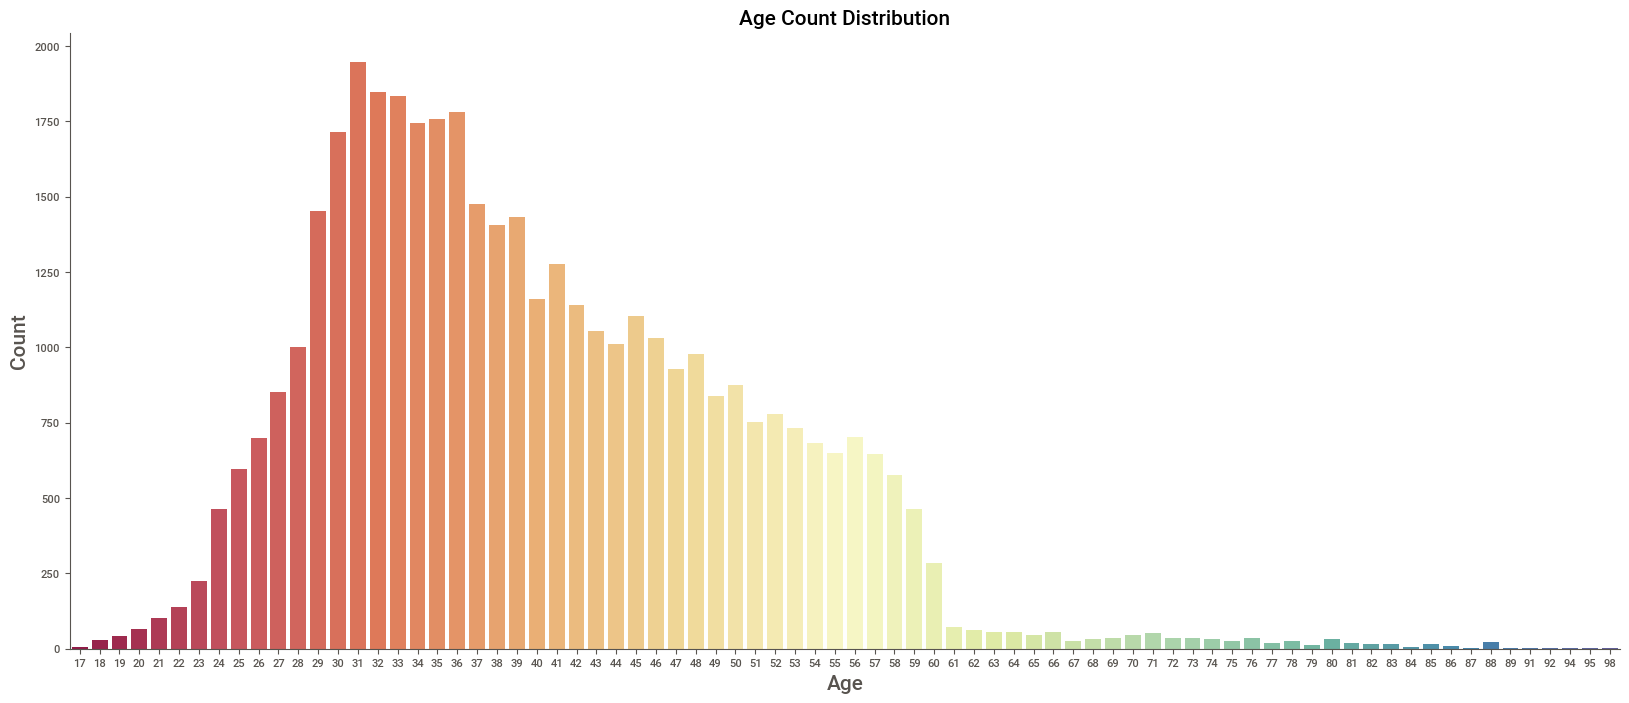

In [26]:
#AGE
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client,palette='Spectral')
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

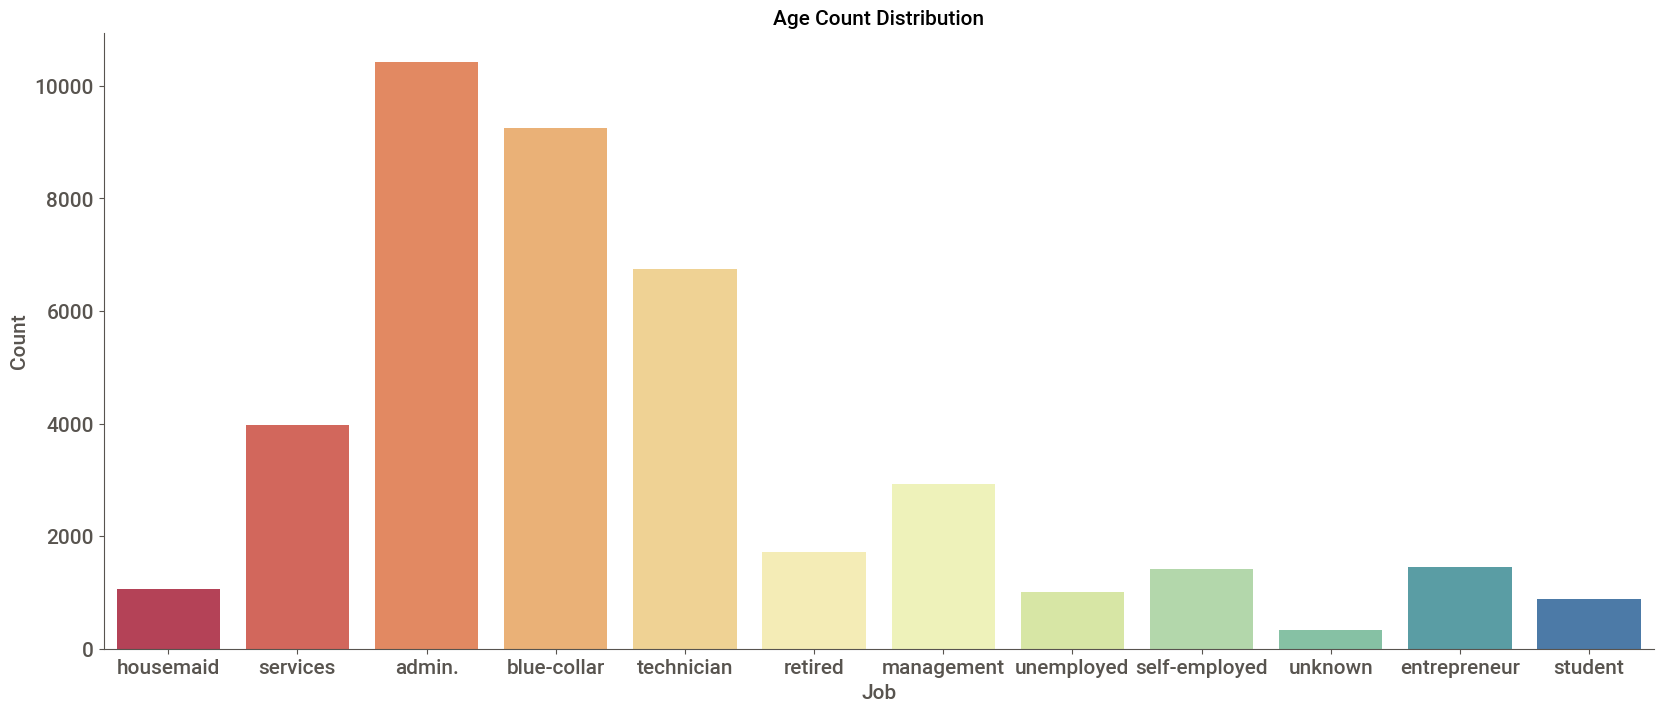

In [27]:
#JOBS
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client,palette='Spectral')
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

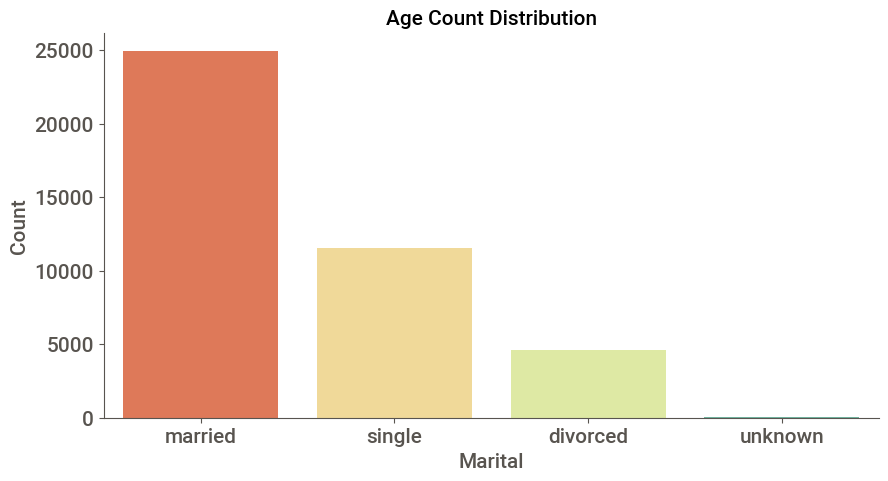

In [28]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client,palette='Spectral')
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

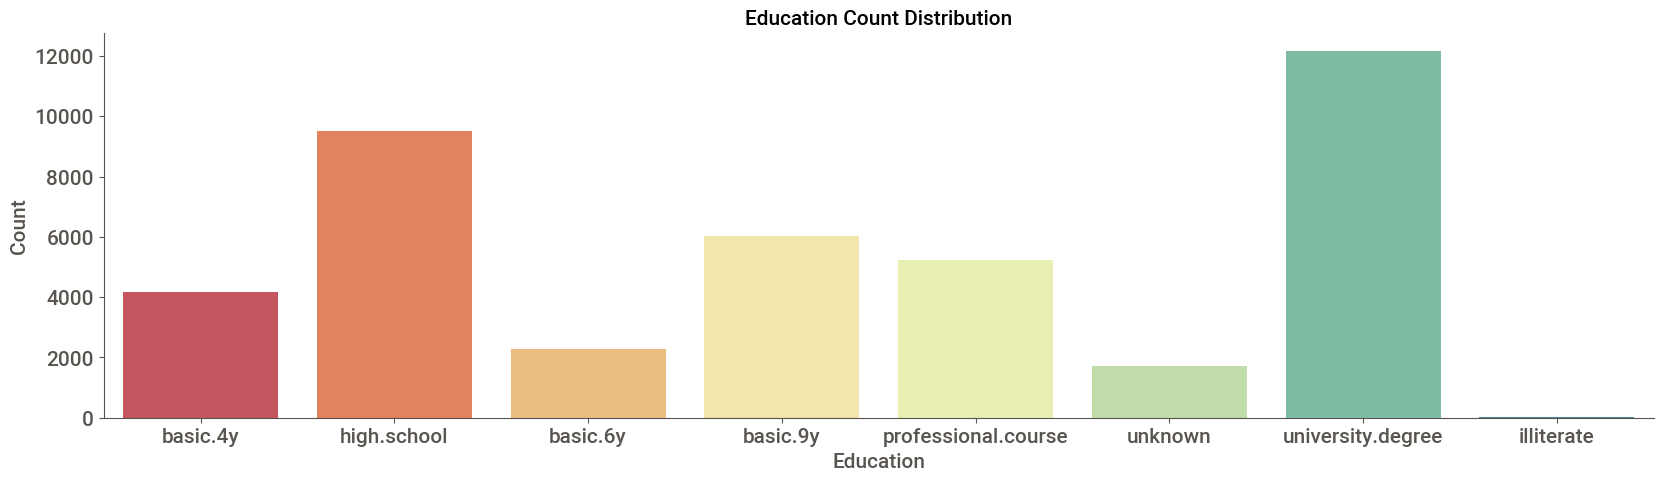

In [29]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x='education', data=bank_client, palette='Spectral')
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.show()


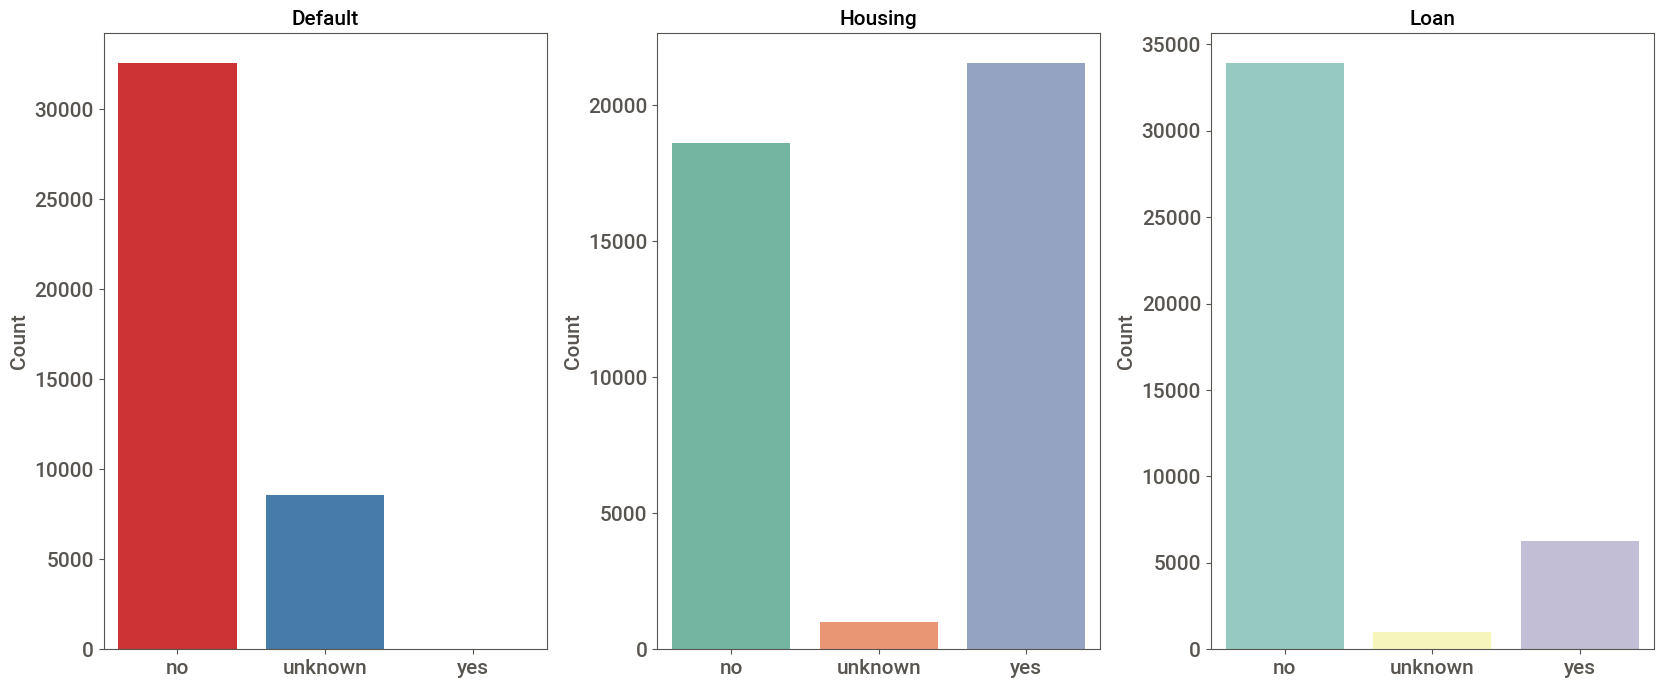

In [30]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Default, has credit in default?
sns.countplot(x='default', data=bank_client, ax=ax1, order=['no', 'unknown', 'yes'], palette='Set1')
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan?
sns.countplot(x='housing', data=bank_client, ax=ax2, order=['no', 'unknown', 'yes'], palette='Set2')
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan?
sns.countplot(x='loan', data=bank_client, ax=ax3, order=['no', 'unknown', 'yes'], palette='Set3')
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
plt.show()

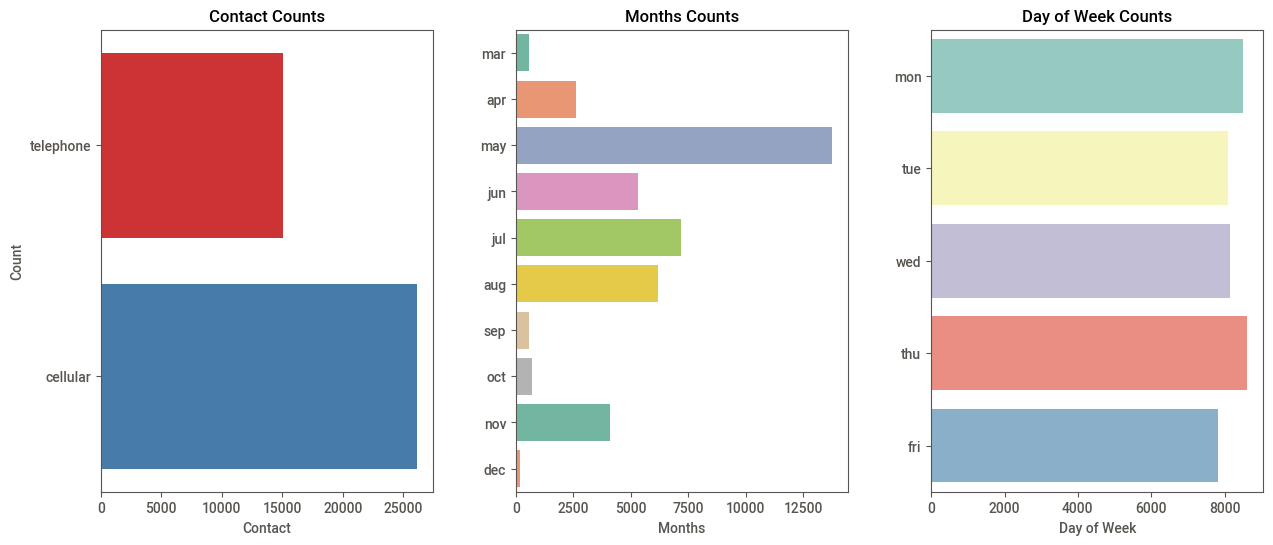

In [31]:
#Contact, Month, Day of Week
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(data['contact'], ax = ax1,palette='Set1')
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(data['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],palette='Set2')
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(data['day_of_week'], ax = ax3,palette='Set3')
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [32]:
data1=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']]

In [33]:
data1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [34]:
# in pdays if client never contacted is determined by 999 so we are going to replace it with the 0
data['pdays'].replace({999 : 0},inplace=True)

In [35]:
data2=data[['duration','campaign','pdays','previous']]
data2

,duration,campaign,pdays,previous
0,261,1,0,0
1,149,1,0,0
2,226,1,0,0
3,151,1,0,0
4,307,1,0,0
...,...,...,...,...
41183,334,1,0,0
41184,383,1,0,0
41185,189,2,0,0
41186,442,1,0,0


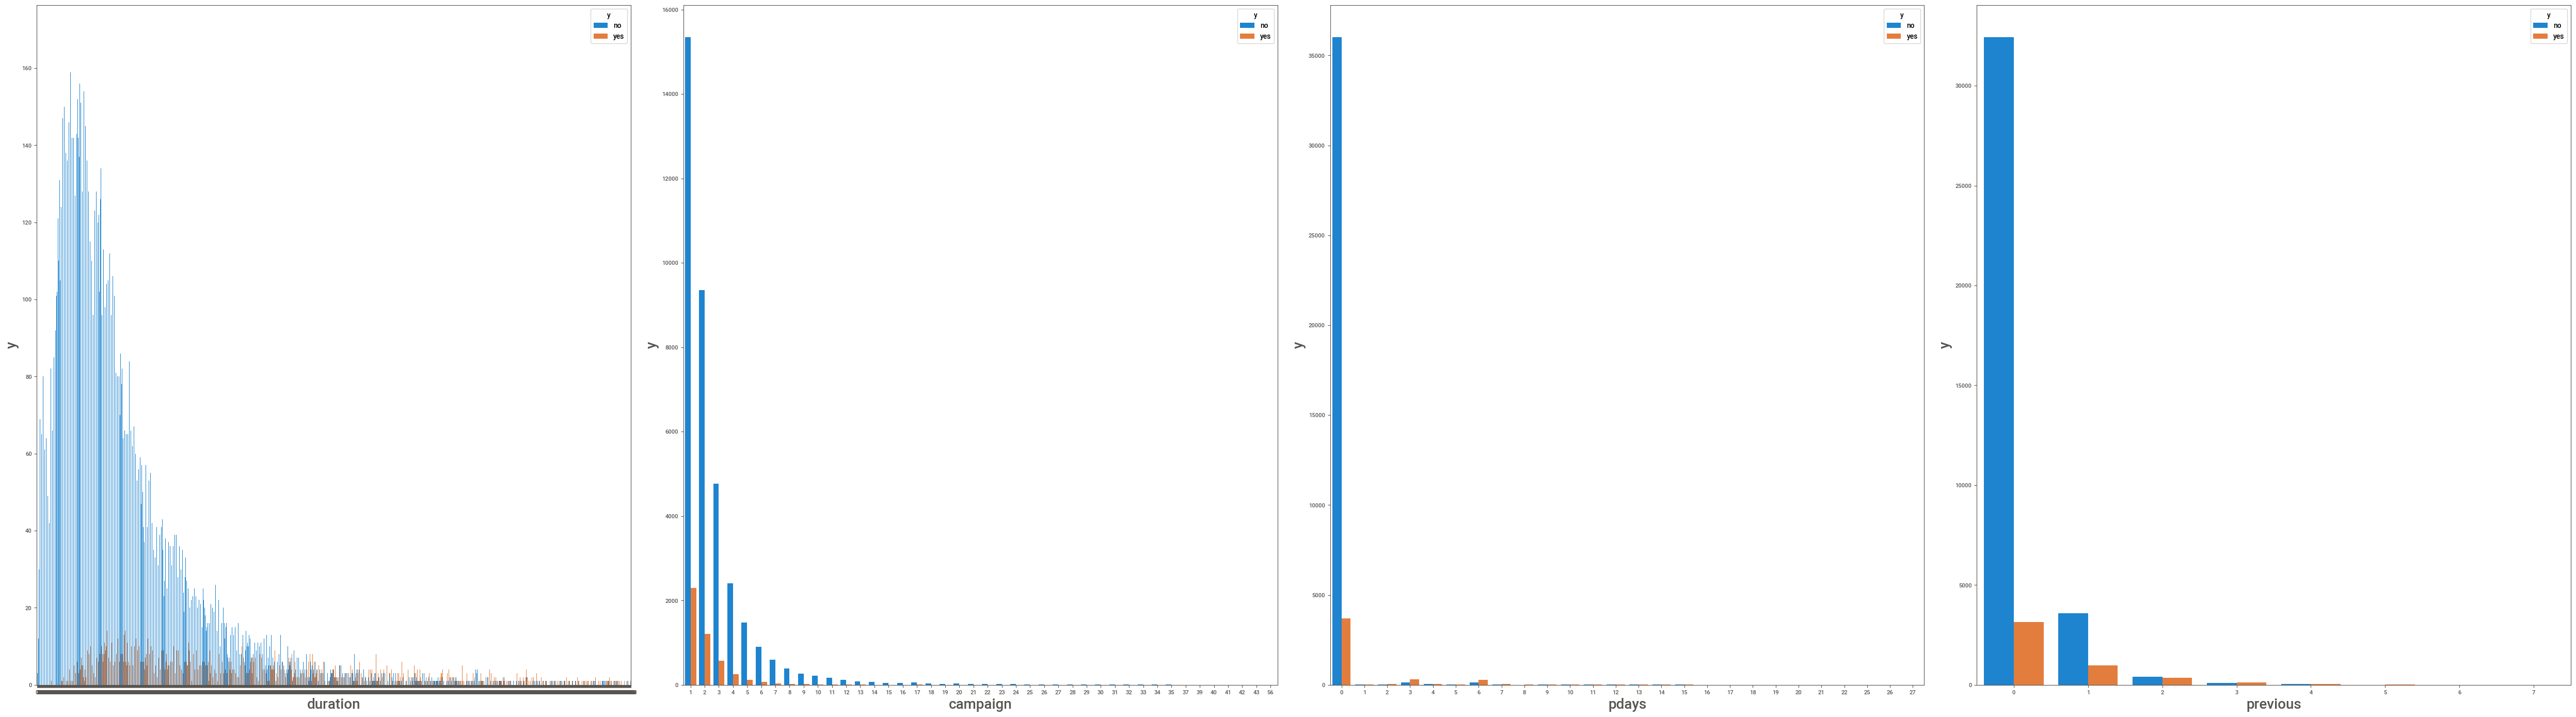

In [36]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(50,55), facecolor='white')#canvas size
plotnumber = 1

for column in data2:
    if plotnumber<=4 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column].dropna(axis=0)
                        ,hue=data.y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Data Processing
### Handling Categorical Variables

In [38]:
# Data Processing
# Handling Categorical Variables
from sklearn.preprocessing import StandardScaler, LabelEncoder
for col in data.select_dtypes(include=['object']).columns:
    if col != 'y':
        data[col] = LabelEncoder().fit_transform(data[col])

data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [39]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


## Handling Outliers

In [41]:
num_data = data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

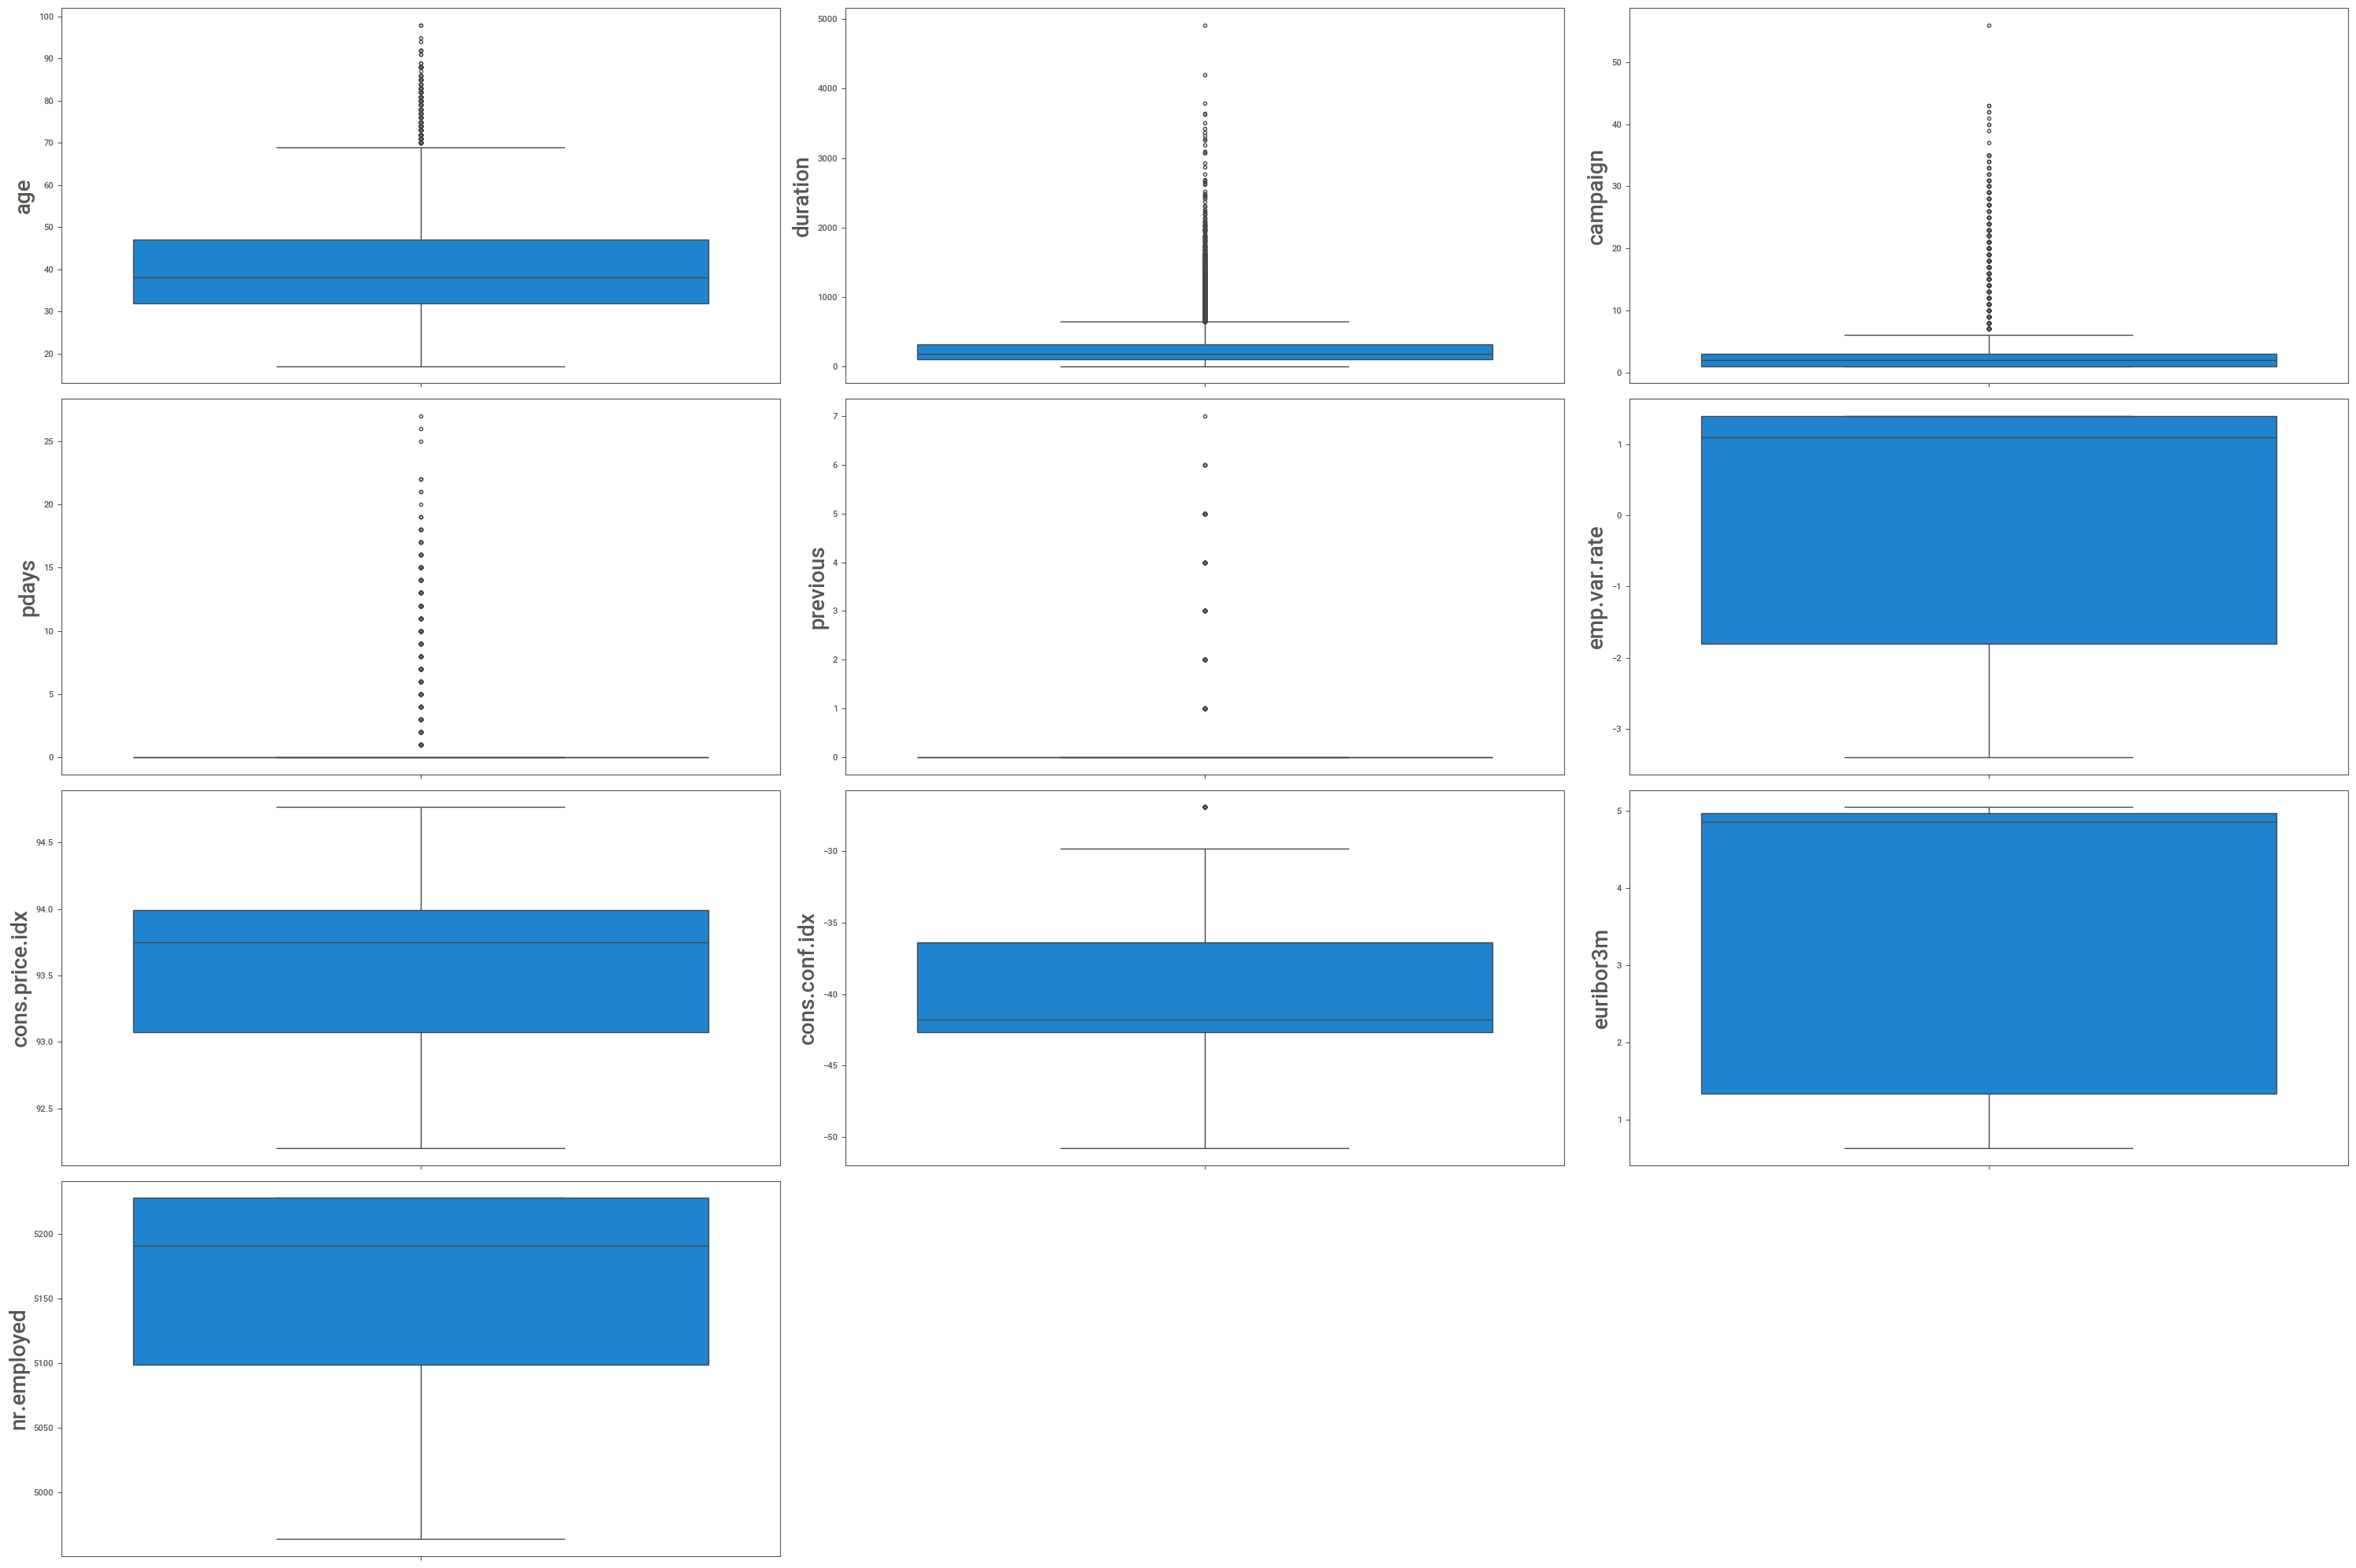

In [42]:
# checking outliers 
plt.figure(figsize=(30,20))
pltno = 1
for col in num_data :
    if pltno <= 10 :
        ax = plt.subplot(4,3,pltno)
        sns.boxplot(data[col])
        plt.ylabel(col,fontsize=20)
    pltno += 1
plt.tight_layout()

In [43]:
# before handling outliers making a copy of dataframe
data3 = data.copy()

## Skewness

In [45]:
data['age'].skew()

0.7846968157646645

## IQR

In [47]:
# age
from scipy import stats
#IQR = stats.iqr(data['age'],interpolation='midpoint')
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

In [48]:
IQR=Q3-Q1
IQR

15.0

In [49]:
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR
print("Minimum Limit:", min_limit)
print("Maximum Limit:", max_limit)

Minimum Limit: 9.5
Maximum Limit: 69.5


In [50]:
data[data['age'] < min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [51]:
data[data['age'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,5,0,0,0,2,0,0,5,1,...,3,0,0,1,-1.8,92.843,-50.0,1.811,5099.1,1
27757,76,5,1,6,0,0,2,0,5,2,...,9,0,0,1,-1.8,92.843,-50.0,1.757,5099.1,0
27780,73,5,1,6,0,2,0,0,5,3,...,1,0,1,0,-1.8,92.843,-50.0,1.687,5099.1,0
27800,88,5,0,0,0,2,0,0,5,4,...,1,0,0,1,-1.8,92.843,-50.0,1.663,5099.1,0
27802,88,5,0,0,0,0,0,0,5,4,...,2,0,0,1,-1.8,92.843,-50.0,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,5,0,0,1,2,2,0,8,1,...,4,3,1,2,-1.1,94.601,-49.5,1.000,4963.6,0
40996,81,5,1,0,0,2,0,0,8,4,...,1,0,2,0,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,5,1,5,0,2,0,0,8,2,...,1,0,1,0,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73,5,1,5,0,2,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [52]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['age']>max_limit]) / len(data) *100

1.1386811692726035

In [53]:
#imputing  the outliers using median
data.loc[data['age']>max_limit,'age']=data['age'].median()

In [54]:
data.age.median()

38.0

In [55]:
data.loc[data['age']==38]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
42,38,0,2,5,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
82,38,0,1,3,1,0,0,1,6,1,...,2,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
84,38,9,2,6,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
144,38,11,0,3,1,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
166,38,7,1,3,0,2,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41165,38,3,0,6,0,0,0,0,7,4,...,2,0,0,1,-1.1,94.767,-50.8,1.030,4963.6,1
41168,38,2,1,6,0,0,0,0,7,4,...,2,0,0,1,-1.1,94.767,-50.8,1.030,4963.6,0
41176,38,3,0,3,0,2,2,0,7,2,...,1,0,0,1,-1.1,94.767,-50.8,1.031,4963.6,0
41183,38,5,1,5,0,2,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [56]:
data[data['age'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [57]:
# duration
data['duration'].skew()

3.263141255262832

In [58]:
from scipy import stats
IQR = stats.iqr(data['duration'],interpolation='midpoint')
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

In [59]:
data[data['duration'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52,9,1,2,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
57,45,7,1,3,1,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
61,51,1,1,2,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
75,41,1,0,0,1,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,1
83,49,2,1,6,1,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,9,2,5,0,2,0,0,7,0,...,2,19,1,2,-1.1,94.767,-50.8,1.040,4963.6,1
41153,67,3,0,5,0,2,0,0,7,1,...,2,5,5,2,-1.1,94.767,-50.8,1.039,4963.6,1
41160,33,0,1,6,0,0,0,0,7,3,...,1,0,0,1,-1.1,94.767,-50.8,1.035,4963.6,1
41164,54,0,1,5,0,0,0,0,7,3,...,2,10,1,2,-1.1,94.767,-50.8,1.035,4963.6,1


In [60]:
data[data['duration'] < min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [61]:
#imputing  the outliers using median
data.loc[data['duration']>max_limit,'duration']=data['duration'].median()

In [62]:
data.duration.median()

180.0

In [63]:
data.loc[data['duration']==180]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52,9,1,2,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
57,45,7,1,3,1,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
61,51,1,1,2,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
75,41,1,0,0,1,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,1
83,49,2,1,6,1,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41153,67,3,0,5,0,2,0,0,7,1,...,2,5,5,2,-1.1,94.767,-50.8,1.039,4963.6,1
41160,33,0,1,6,0,0,0,0,7,3,...,1,0,0,1,-1.1,94.767,-50.8,1.035,4963.6,1
41164,54,0,1,5,0,0,0,0,7,3,...,2,10,1,2,-1.1,94.767,-50.8,1.035,4963.6,1
41166,32,0,1,6,0,0,0,1,7,4,...,1,0,1,0,-1.1,94.767,-50.8,1.030,4963.6,1


In [64]:
data[data['duration'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [65]:
# campagin
data['campaign'].skew()

4.762506697067009

In [66]:
from scipy import stats
IQR = stats.iqr(data['campaign'],interpolation='midpoint')
Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

In [67]:
data[data['campaign'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,0,1,6,0,0,0,1,6,4,...,7,0,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1043,41,9,2,6,1,0,0,1,6,4,...,8,0,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1094,40,9,1,5,0,2,0,1,6,4,...,8,0,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1097,51,1,1,0,1,2,0,1,6,4,...,7,0,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1230,48,1,0,0,0,0,0,1,6,2,...,7,0,0,1,1.1,93.994,-36.4,4.855,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,5,1,2,0,0,0,1,9,0,...,9,0,1,0,-1.1,94.199,-37.5,0.883,4963.6,0
40631,38,5,1,0,0,2,0,0,9,1,...,7,0,0,1,-1.1,94.199,-37.5,0.882,4963.6,0
40698,29,9,2,5,0,2,0,0,9,1,...,7,3,5,2,-1.1,94.199,-37.5,0.879,4963.6,0
40821,33,9,2,5,0,2,0,0,9,0,...,9,0,2,0,-1.1,94.199,-37.5,0.879,4963.6,0


In [68]:
data[data['campaign'] < min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [69]:
#imputing  the outliers using median
data.loc[data['campaign']>max_limit,'campaign']=data['campaign'].median()

In [70]:
data[data['campaign'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [71]:
# pdays
data['pdays'].skew()

7.939537185679886

In [72]:
IQR = stats.iqr(data['pdays'],interpolation='midpoint')
Q1 = data['pdays'].quantile(0.25)
Q3 = data['pdays'].quantile(0.75)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

In [73]:
data[data['pdays'] < min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [74]:
data[data['pdays'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,0,1,6,0,2,0,1,7,4,...,1,6,1,2,-0.1,93.200,-42.0,4.286,5195.8,0
24264,48,4,1,6,0,2,0,0,7,1,...,1,4,1,2,-0.1,93.200,-42.0,4.191,5195.8,0
24279,42,9,1,5,1,2,0,0,7,1,...,1,4,1,2,-0.1,93.200,-42.0,4.191,5195.8,0
24397,50,2,1,6,1,2,0,0,7,1,...,1,3,1,2,-0.1,93.200,-42.0,4.191,5195.8,0
24482,36,6,2,6,0,2,0,0,7,1,...,2,4,1,2,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,9,0,0,0,2,0,0,7,3,...,3,4,2,2,-1.1,94.767,-50.8,1.035,4963.6,1
41164,54,0,1,5,0,0,0,0,7,3,...,2,10,1,2,-1.1,94.767,-50.8,1.035,4963.6,1
41174,62,5,1,6,0,2,0,0,7,2,...,1,1,6,2,-1.1,94.767,-50.8,1.031,4963.6,1
41178,62,5,1,6,0,0,0,0,7,2,...,2,6,3,2,-1.1,94.767,-50.8,1.031,4963.6,1


In [75]:
#imputing  the outliers using median
data.loc[data['pdays']>max_limit,'pdays']=data['pdays'].median()

In [76]:
data[data['pdays'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [77]:
# previous
data['previous'].skew()

3.8320422428611836

In [78]:
IQR = stats.iqr(data['previous'],interpolation='midpoint')
Q1 = data['previous'].quantile(0.25)
Q3 = data['previous'].quantile(0.75)
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR
data[data['previous'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,1,2,7,0,2,0,1,8,3,...,1,0,1,0,-0.1,93.798,-40.4,4.968,5195.8,0
24019,40,7,1,3,0,2,0,1,8,3,...,1,0,1,0,-0.1,93.798,-40.4,4.968,5195.8,1
24076,36,0,1,6,0,2,0,1,7,4,...,1,0,1,0,-0.1,93.200,-42.0,4.663,5195.8,0
24102,36,0,1,3,0,2,0,1,7,4,...,1,0,1,0,-0.1,93.200,-42.0,4.286,5195.8,1
24108,37,0,1,6,0,2,0,1,7,4,...,1,0,1,2,-0.1,93.200,-42.0,4.286,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,5,1,6,0,2,0,0,7,2,...,1,0,6,2,-1.1,94.767,-50.8,1.031,4963.6,1
41175,34,8,2,7,0,2,0,0,7,2,...,1,0,2,0,-1.1,94.767,-50.8,1.031,4963.6,0
41178,62,5,1,6,0,0,0,0,7,2,...,2,0,3,2,-1.1,94.767,-50.8,1.031,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,...,1,0,1,2,-1.1,94.767,-50.8,1.028,4963.6,0


In [79]:
data[data['previous'] < min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [80]:
#imputing  the outliers using median
data.loc[data['previous']>max_limit,'previous']=data['previous'].median()

In [81]:
data[data['previous'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [82]:
# cons.conf.idx
data['cons.conf.idx'].skew()

0.30317985874819237

In [83]:
# since it is normally distributed so we replace with it mean
min_limit = data['cons.conf.idx'].mean() - 3 * data['cons.conf.idx'].std()
max_limit = data['cons.conf.idx'].mean() + 3 * data['cons.conf.idx'].std()

In [84]:
data[data['cons.conf.idx'] > max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [85]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,2,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [86]:
# scaling
for col in num_data :
    print(data[col].skew())

0.4438896393620564
1.1006920174543073
1.3523026677906924
0.0
0.0
-0.7240955492472556
-0.23088765135788006
0.30317985874819237
-0.7091879563778298
-1.044262407089151


In [87]:
# if the column is the normally distributed then we use standard scaler otherwise we use min max scaler for skew data
from sklearn.preprocessing import MinMaxScaler , StandardScaler
minmax_sc = MinMaxScaler()
std_sc = StandardScaler()
data[['duration', 'campaign', 'pdays', 'previous']] =\
minmax_sc.fit_transform(data[['duration', 'campaign', 'pdays', 'previous']])

# for normally distributed features
data[['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] =\
std_sc.fit_transform(data[['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])

In [88]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.706581,3,1,0,0,0,0,1,6,1,...,0.0,0.0,0.0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.810519,7,1,3,1,0,0,1,6,1,...,0.0,0.0,0.0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,-0.268244,7,1,3,0,2,0,1,6,1,...,0.0,0.0,0.0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,0.043571,0,1,1,0,0,0,1,6,1,...,0.0,0.0,0.0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.706581,7,1,3,0,0,2,1,6,1,...,0.0,0.0,0.0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,-0.164305,5,1,5,0,2,0,0,7,0,...,0.0,0.0,0.0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.667200,1,1,5,0,0,0,0,7,0,...,0.0,0.0,0.0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.706581,5,1,6,0,2,0,0,7,0,...,0.2,0.0,0.0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.459323,9,1,5,0,0,0,0,7,0,...,0.0,0.0,0.0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


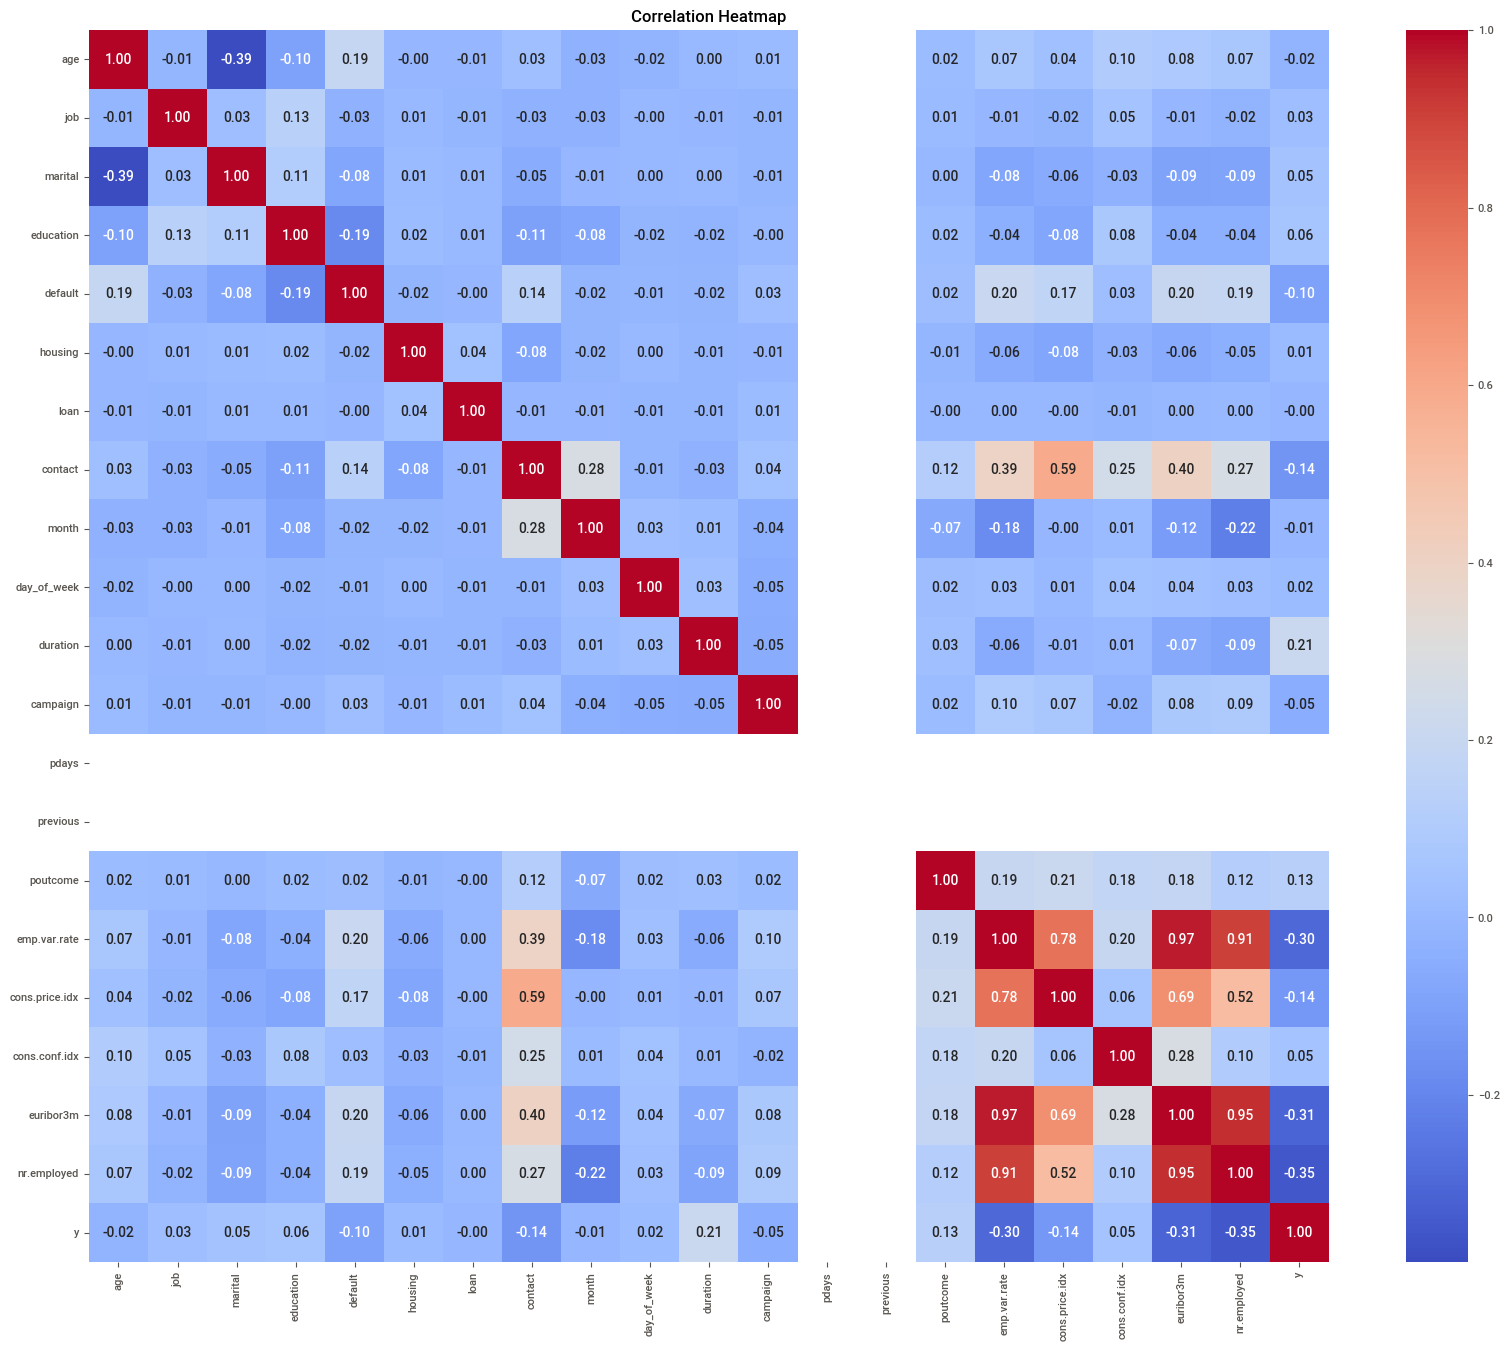

In [89]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [90]:
# emp.varrate , erubor3m , nr.emplyed are highly correlated features so we are going to delete it from dataset
data= data.drop(['emp.var.rate','euribor3m','nr.employed'],axis=1)
# and also from df1 dataframe
data3 = data3.drop(['emp.var.rate','euribor3m','nr.employed'],axis=1)

### Exploratory Data Analysis (EDA)

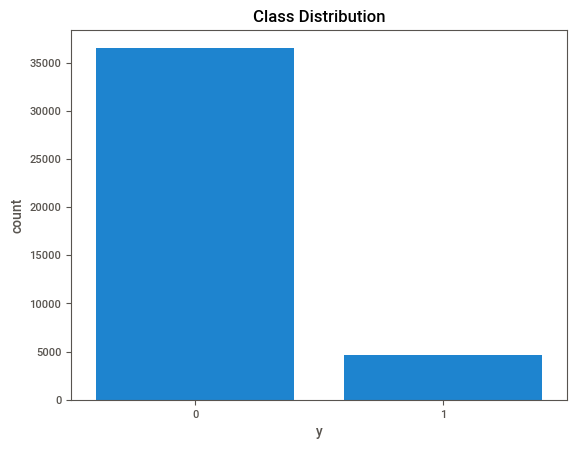

In [92]:
sns.countplot(x='y', data=data)
plt.title("Class Distribution")
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
# Handling Imbalance using SMOTE
X = data.drop(columns=['y'])
y = data['y']

In [95]:
X.shape

(41188, 17)

In [96]:
y.shape

(41188,)

In [97]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [98]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state=3)

In [99]:
data.y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [100]:
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [101]:
#Smote is always applied on training data
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [102]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 29222, 1: 3728})
SMOTE Classes Counter({1: 29222, 0: 29222})


### SVC

In [104]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [105]:
# Predict output for X_test
y_hat=svclassifier.predict(X_test)

In [106]:
y_hat

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [107]:
y_test

11452    0
18699    0
39647    0
21461    0
32993    0
        ..
25875    0
16086    0
19192    0
17914    0
35722    1
Name: y, Length: 8238, dtype: int64

In [108]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7831998057781014

In [109]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.3962136578769439

In [110]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives
# are used to predict the metrics of a classification report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7326
           1       0.29      0.64      0.40       912

    accuracy                           0.78      8238
   macro avg       0.62      0.72      0.63      8238
weighted avg       0.87      0.78      0.82      8238



In [111]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=5,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.         0.         0.         0.         0.00354988]
Cross validation Score: 0.0007099751508697196
Std : 0.0014199503017394391


### Random forest classifier

In [113]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [114]:
y_pred=RF.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred)

0.9085943190094683

### Logistic Regression

In [117]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='saga', max_iter=1000)
LR.fit(X_train,y_train)


LogisticRegression(max_iter=1000, solver='saga')

In [118]:
y_pred=LR.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.8937848992473901

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7326
           1       0.65      0.09      0.16       912

    accuracy                           0.89      8238
   macro avg       0.77      0.54      0.55      8238
weighted avg       0.87      0.89      0.86      8238



### Decision Tree

In [122]:
### Since DT , RF , ensembling methods are robust to outliers and do not need to scale so we are going to use 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_smote,y_smote)
y_pred = DT.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print('recall score : ',recall_score(y_test,y_pred))
print('f1 score : ',f1_score(y_test,y_pred))
print('precision score : ',precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy score :  0.8676863316338917
recall score :  0.5756578947368421
f1 score :  0.49065420560747663
precision score :  0.42752442996742673
[[6623  703]
 [ 387  525]]


In [123]:
# hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': [None, 'sqrt', 'log2']
}
# Perform RandomizedSearchCV
RF= RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=50, cv=5,
                                   scoring='accuracy', verbose=1, random_state=42)
RF.fit(X_smote, y_smote)
# Best parameters
print("Best Parameters:", RF.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 20, 'criterion': 'entropy'}


In [124]:
#DT after hyperparametertuning
DT = DecisionTreeClassifier(min_samples_split = 6 , min_samples_leaf = 3 , max_features=None , max_depth = 20,criterion = 'entropy')
DT.fit(X_smote,y_smote)
y_pred = DT.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print('recall score : ',recall_score(y_test,y_pred))
print('f1 score : ',f1_score(y_test,y_pred))
print('precision score : ',precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy score :  0.8715707696042729
recall score :  0.5603070175438597
f1 score :  0.4913461538461538
precision score :  0.4375
[[6669  657]
 [ 401  511]]


### XGB Classifier

In [126]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [127]:
y_hat=xgb_r.predict(X_test)#predicting the price

In [128]:
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
accuracy_score(y_test,y_hat)

0.9087157076960427

In [130]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7326
           1       0.60      0.51      0.55       912

    accuracy                           0.91      8238
   macro avg       0.77      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238



### Bagging  Classifier

In [132]:
from sklearn.ensemble import BaggingClassifier

model_bag=BaggingClassifier(estimator=svclassifier,n_estimators=21)

model_bag.fit(X_train,y_train)


BaggingClassifier(estimator=SVC(), n_estimators=21)

In [133]:
y_hat_bag=model_bag.predict(X_test)
ac_svc1_bag=accuracy_score(y_test,y_hat_bag)
ac_svc1_bag

0.8935421218742413

### KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.2035688273852877,
 0.17686331633891722,
 0.23403738771546492,
 0.2057538237436271,
 0.2540665210002428,
 0.2242049041029376,
 0.25843651371692156,
 0.23391599902889051,
 0.2628065064336004,
 0.23962126729788782]

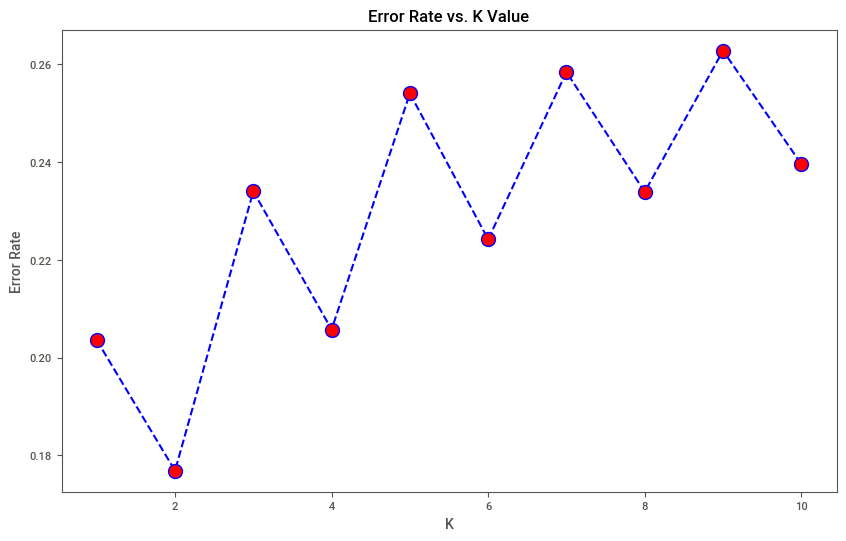

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [137]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_smote,y_smote)


KNeighborsClassifier(n_neighbors=7)

In [138]:
y_pred = knn.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print('recall score : ',recall_score(y_test,y_pred))
print('f1 score : ',f1_score(y_test,y_pred))
print('precision score : ',precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy score :  0.7415634862830784
recall score :  0.5296052631578947
f1 score :  0.31211631663974154
precision score :  0.2212551534585433
[[5626 1700]
 [ 429  483]]


### Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_smote,y_smote)
y_pred = nb.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,y_pred))
print('recall score : ',recall_score(y_test,y_pred))
print('f1 score : ',f1_score(y_test,y_pred))
print('precision score : ',precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy score :  0.6209031318281136
recall score :  0.7236842105263158
f1 score :  0.2970965563808238
precision score :  0.18691588785046728
[[4455 2871]
 [ 252  660]]


### Final Selection of Model

In [260]:
# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVC': SVC(C=5,gamma=0.1,kernel='rbf',random_state=1),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1', 'Precision'])

# Train and evaluate models
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_smote, y_smote)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy, recall, f1, precision
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')  # Adjust for multiclass if needed
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        
        # Append to DataFrame using loc
        results.loc[len(results)] = {'Model': model_name, 'Accuracy': acc, 'Recall': recall, 'F1': f1, 'Precision': precision}
        
    except Exception as e:
        # Handle models that fail (e.g., Naive Bayes for regression)
        print(f"Model {model_name} failed: {e}")

# Display results
print(results)

                 Model  Accuracy    Recall        F1  Precision
0  Logistic Regression  0.702962  0.702962  0.756111   0.863326
1                  KNN  0.765963  0.765963  0.797812   0.845788
2                  SVC  0.819738  0.819738  0.837439   0.862667


In [262]:
# we build model in 2 steps bcoz dt , rf etc are robust to outliers
# Dictionary to store models
models = {
    'Decision Tree': DecisionTreeClassifier(min_samples_split = 6 , min_samples_leaf = 3 , max_features=None , max_depth = 20,criterion = 'entropy'),
    'Random Forest': RandomForestClassifier(n_estimators=100,min_samples_split=2,min_samples_leaf=3,max_features='sqrt',max_depth=10,bootstrap=True),
    'Bagging': BaggingClassifier(),
    'Boosting': XGBClassifier(),
    'Naive Bayes': GaussianNB()  # Note: Naive Bayes is not directly applicable for regression
}

# DataFrame to store results
data = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1', 'Precision'])

# Train and evaluate models
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_smote, y_smote)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy, recall, f1, precision
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')  # Adjust for multiclass if needed
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        
        # Append to DataFrame using loc
        data.loc[len(data)] = {'Model': model_name, 'Accuracy': acc, 'Recall': recall, 'F1': f1, 'Precision': precision}
        
    except Exception as e:
        # Handle models that fail (e.g., Naive Bayes for regression)
        print(f"Model {model_name} failed: {e}")

# Display results
print(data)

           Model  Accuracy    Recall        F1  Precision
0  Decision Tree  0.873270  0.873270  0.879628   0.887975
1  Random Forest  0.818403  0.818403  0.845093   0.899700
2        Bagging  0.889294  0.889294  0.892023   0.895228
3       Boosting  0.901190  0.901190  0.903292   0.905771
4    Naive Bayes  0.620903  0.620903  0.691380   0.862376


In [264]:
a = pd.concat([results, data], axis=0, ignore_index=True)

In [266]:
a.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)

,Model,Accuracy,Recall,F1,Precision
0,Boosting,0.901190,0.901190,0.903292,0.905771
1,Bagging,0.889294,0.889294,0.892023,0.895228
2,Decision Tree,0.873270,0.873270,0.879628,0.887975
3,SVC,0.819738,0.819738,0.837439,0.862667
4,Random Forest,0.818403,0.818403,0.845093,0.899700
5,KNN,0.765963,0.765963,0.797812,0.845788
6,Logistic Regression,0.702962,0.702962,0.756111,0.863326
7,Naive Bayes,0.620903,0.620903,0.691380,0.862376


## Conclusion

1. The best model in this regard is boosting with it's accuracy of 90.10 % and precision of 90.05 %.

2. SVC, Decision Tree and Bagging are another models which are efficient and can be used in this regard.

## Challenges Faced

1.Knowledge of the Domain:  We spent much time in understanding the dataset and the tasks in order to give our project the proper direction.

2.Loading Dataset:  We had problem in loading dataset because dataset is comma separated and not in proper tabular form.

3.Time constraint:  Using multiple models and training them is time consuming.
